# Classification of b-quark jets in the Aleph simulated data

Python macro for selecting b-jets in Aleph Z->qqbar MC using (kernel) Principle Component Analysis, (k)PCA.

These are among the simplest **unsupervised learning** techniques, and can be considered a quick way to look at new high dimensional data, without knowing much about it. However, notice that cleaning and pre-processing might be needed, as NaN/9999 values will ruin the approach.

### Data:
The input variables (X) are:
* energy: Measured energy of the jet in GeV. Should be 45 GeV, but fluctuates.
* cTheta: cos(theta), i.e. the polar angle of the jet with respect to the beam axis.
          The detector works best in the central region (|cTheta| small) and less well in the forward regions.
* phi:    The azimuth angle of the jet. As the detector is uniform in phi, this should not matter (much).
* prob_b: Probability of being a b-jet from the pointing of the tracks to the vertex.
* spheri: Sphericity of the event, i.e. how spherical it is.
* pt2rel: The transverse momentum squared of the tracks relative to the jet axis, i.e. width of the jet.
* multip: Multiplicity of the jet (in a relative measure).
* bqvjet: b-quark vertex of the jet, i.e. the probability of a detached vertex.
* ptlrel: Transverse momentum (in GeV) of possible lepton with respect to jet axis (about 0 if no leptons).

The target variable (Y) - **which is not to be used here for anything other than final evaluation** is:
* isb:    1 if it is from a b-quark and 0, if it is not.

### Task:
Thus, in the following we apply PCA and kPCA to the Aleph b-jet data.


* Authors: Troels C. Petersen, Carl Johnsen (NBI)
* Email:   petersen@nbi.dk, cjjohnsen@nbi.ku.dk
* Date:    3rd of May 2021

In [1]:
from __future__ import print_function, division   # Ensures Python3 printing & division standard
from matplotlib import pyplot as plt
from matplotlib import colors
from matplotlib.colors import LogNorm
import numpy as np
import csv
from sklearn.preprocessing import quantile_transform
from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA

In [2]:
r = np.random
r.seed(42)

SavePlots = False
plt.close('all')

***

# PCA:

In [3]:
Btag1 = np.loadtxt('../Week1/AlephBtag_MC_small_v2.csv',skiprows=1)
X = Btag1[:,:-1]
y = Btag1[:,-1]
print ('First X entry: ', X[0])

First X entry:  [ 4.68299e+01  3.87100e-01  8.52800e-01  3.27000e-02  2.10500e-01
  3.02000e-02  4.77600e-01  3.14000e-02 -3.00000e-04  1.64200e-01]


In [4]:
X_scaled = quantile_transform(X, copy=True)
print ('First scaled X entry: ', X_scaled[0])

First scaled X entry:  [0.63363363 0.70739357 0.63502411 0.48048048 0.25305305 0.28328328
 0.80705706 0.30356191 0.         0.29696363]


In [5]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
print ('First PCA X entry:', X_pca[0])

First PCA X entry: [-0.2759173  -0.13679499]


In [6]:
print (pca.explained_variance_ratio_)

[0.27906285 0.14808323]


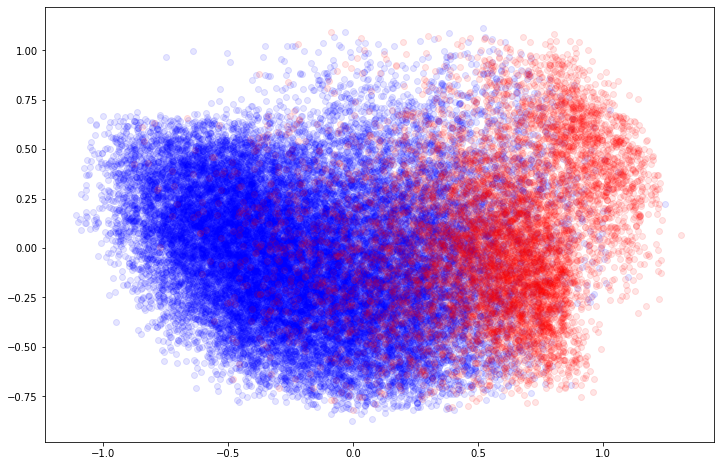

In [7]:
fig, ax = plt.subplots(figsize=(12, 8))
truths = np.array([X_pca[i] for i in range(len(y)) if y[i] == 1])
falses = np.array([X_pca[i] for i in range(len(y)) if y[i] != 1])
plt.scatter(falses[:,0], falses[:,1], color='blue', alpha=.1)
plt.scatter(truths[:,0], truths[:,1], color='red', alpha=.1)
plt.show()

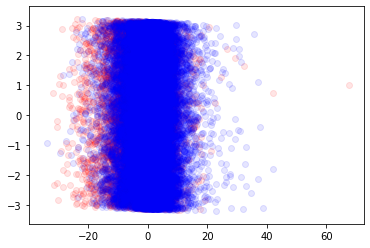

In [9]:
kpca = KernelPCA(n_components=2)
kpca.fit(X)

kpca_x = kpca.transform(X)
truths = np.array([kpca_x[i] for i in range(len(y)) if y[i] == 1])
falses = np.array([kpca_x[i] for i in range(len(y)) if y[i] != 1])
plt.scatter(truths[:,0], truths[:,1], color='red', alpha=.1)
plt.scatter(falses[:,0], falses[:,1], color='blue', alpha=.1)
plt.show()